## Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## EDA

Tasa de churn: 26.54%


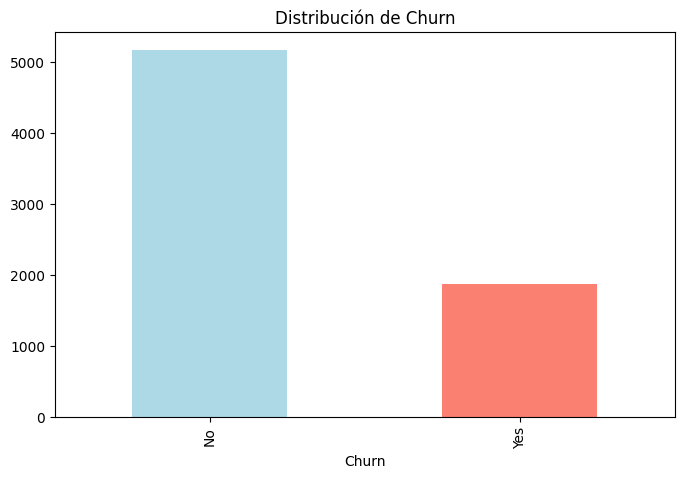

In [9]:
# Sección 1: Análisis churn
churn = df['Churn'].value_counts(normalize=True) * 100
print(f"Tasa de churn: {churn['Yes']:.2f}%")

plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución de Churn')
plt.show()


Contract:
Contract
Month-to-month    42.7
One year          11.3
Two year           2.8
Name: Churn, dtype: float64


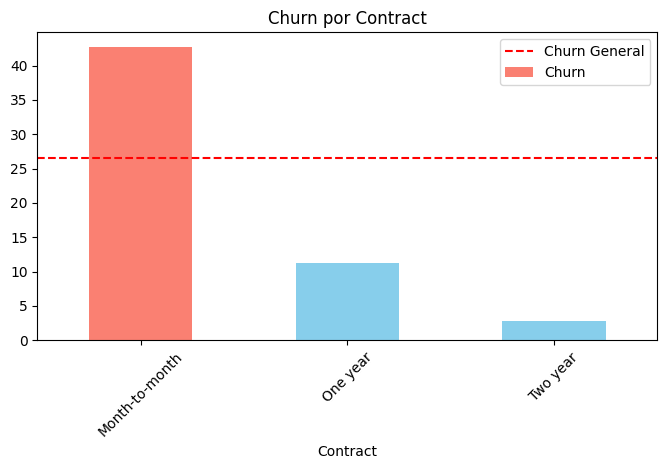


InternetService:
InternetService
DSL            19.0
Fiber optic    41.9
No              7.4
Name: Churn, dtype: float64


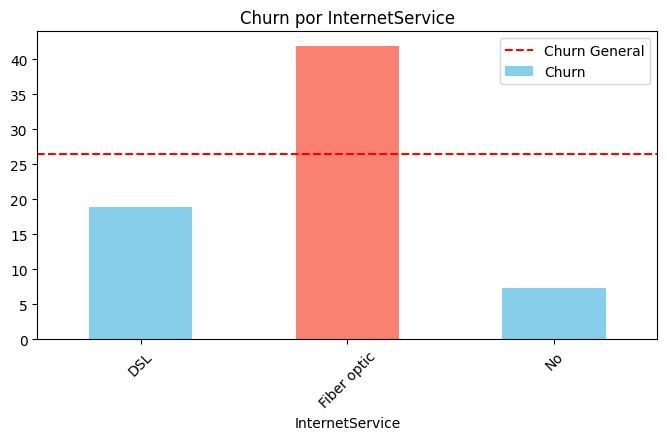


PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.7
Credit card (automatic)      15.2
Electronic check             45.3
Mailed check                 19.1
Name: Churn, dtype: float64


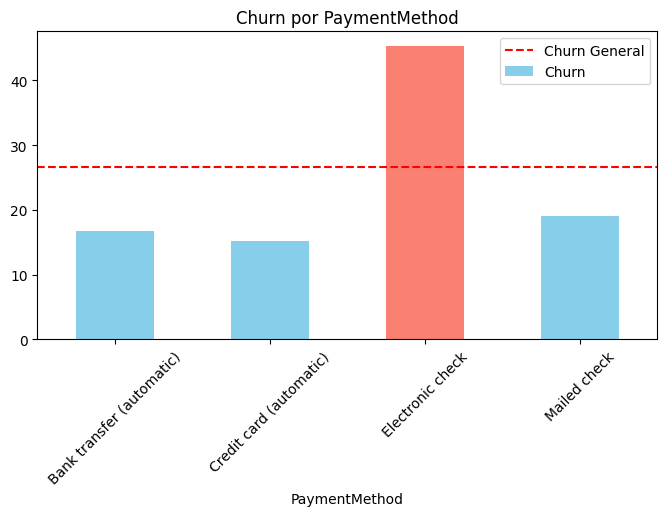

In [10]:
# Sección 2: Variables categóricas
categorical_vars = ['Contract', 'InternetService', 'PaymentMethod']

for var in categorical_vars:
    # Tasas de churn por categoría
    churn_rates = df.groupby(var)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

    print(f"\n{var}:")
    print(churn_rates.round(1))

    plt.figure(figsize=(8, 4))
    churn_rates.plot(kind='bar', color=['skyblue' if x < 30 else 'salmon' for x in churn_rates])
    plt.axhline(y=churn['Yes'], color='red', linestyle='--', label='Churn General')
    plt.title(f'Churn por {var}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

/tmp/ipython-input-2744222867.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)


Churn por antigüedad:
TenureGroup
0-1a    47.7
1-2a    28.7
2-3a    21.6
3+a     11.9
Name: Churn, dtype: float64


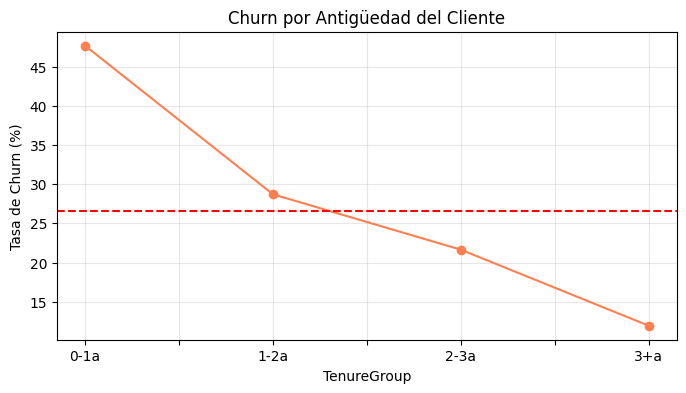

In [11]:
# Sección 3: Análisis de tenure
# grupos de tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 72], labels=['0-1a', '1-2a', '2-3a', '3+a'])

tenure_churn = df.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("Churn por antigüedad:")
print(tenure_churn.round(1))

plt.figure(figsize=(8, 4))
tenure_churn.plot(kind='line', marker='o', color='coral')
plt.axhline(y=churn['Yes'], color='red', linestyle='--', label='Churn General')
plt.title('Churn por Antigüedad del Cliente')
plt.ylabel('Tasa de Churn (%)')
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
# Sección 5: Segmentos críticos

# Segmento 1: Contrato mensual + Fibra óptica
segment1 = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')]
churn1 = segment1['Churn'].eq('Yes').mean() * 100
print(f"1. Monthly + Fibra: {len(segment1)} clientes, {churn1:.1f}% churn")

# Segmento 2: Senior + Monthly
segment2 = df[(df['SeniorCitizen'] == 1) & (df['Contract'] == 'Month-to-month')]
churn2 = segment2['Churn'].eq('Yes').mean() * 100
print(f"2. Senior + Monthly: {len(segment2)} clientes, {churn2:.1f}% churn")

# Segmento 3: Electronic check + Monthly
segment3 = df[(df['PaymentMethod'] == 'Electronic check') & (df['Contract'] == 'Month-to-month')]
churn3 = segment3['Churn'].eq('Yes').mean() * 100
print(f"3. Electronic Check + Monthly: {len(segment3)} clientes, {churn3:.1f}% churn")

1. Monthly + Fibra: 2128 clientes, 54.6% churn
2. Senior + Monthly: 807 clientes, 54.6% churn
3. Electronic Check + Monthly: 1850 clientes, 53.7% churn


In [13]:
# Sección 7: Resumen

print(f"\nTASA CHURN GENERAL: {churn['Yes']:.1f}%")

# KPIs basados en análisis
monthly_pct = (df['Contract'] == 'Month-to-month').mean() * 100
electronic_pct = (df['PaymentMethod'] == 'Electronic check').mean() * 100
fiber_pct = (df['InternetService'] == 'Fiber optic').mean() * 100

print(f"\nKPIs CLAVE:")
print(f"1. % Contratos mensuales: {monthly_pct:.1f}%")
print(f"2. % Fibra óptica: {fiber_pct:.1f}%")
print(f"3. % Electronic check: {electronic_pct:.1f}%")
print(f"4. Churn clientes nuevos (<1 año): {tenure_churn['0-1a']:.1f}%")
print(f"5. Churn senior citizens: {df[df['SeniorCitizen']==1]['Churn'].eq('Yes').mean()*100:.1f}%")

print(f"\nSEGMENTOS CRÍTICOS:")
print(f"• Monthly + Fibra: {churn1:.1f}% churn")
print(f"• Senior + Monthly: {churn2:.1f}% churn")
print(f"• Electronic Check + Monthly: {churn3:.1f}% churn")


TASA CHURN GENERAL: 26.5%

KPIs CLAVE:
1. % Contratos mensuales: 55.0%
2. % Fibra óptica: 44.0%
3. % Electronic check: 33.6%
4. Churn clientes nuevos (<1 año): 47.7%
5. Churn senior citizens: 41.7%

SEGMENTOS CRÍTICOS:
• Monthly + Fibra: 54.6% churn
• Senior + Monthly: 54.6% churn
• Electronic Check + Monthly: 53.7% churn


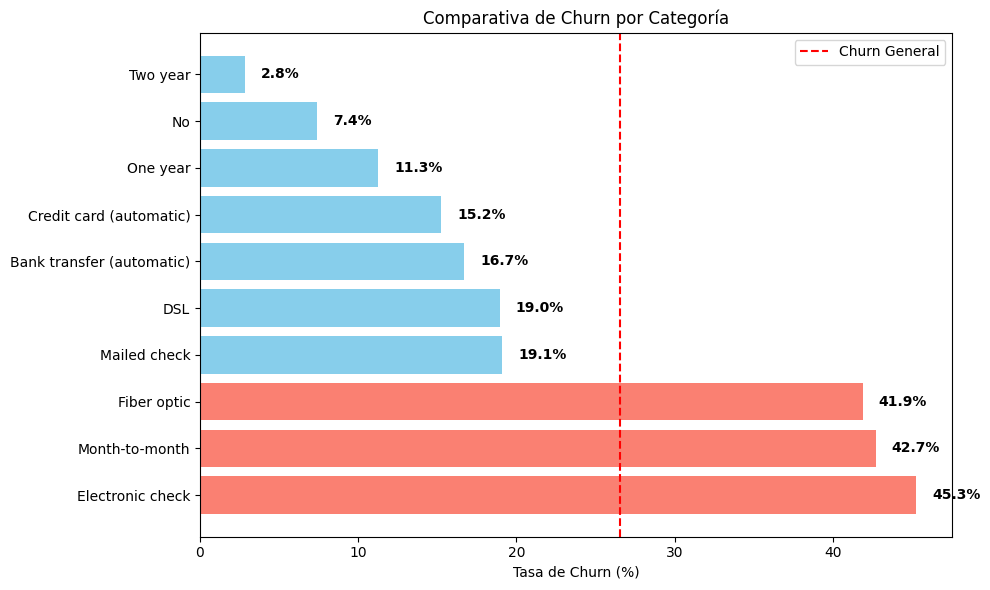

In [14]:
# Sección 8: Gráfico comparativo

# Datos para comparación
comparison_data = []
variables = ['Contract', 'InternetService', 'PaymentMethod']

for var in variables:
    rates = df.groupby(var)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    for category, rate in rates.items():
        comparison_data.append({'Variable': var, 'Categoría': category, 'Churn': rate})

comparison_df = pd.DataFrame(comparison_data)

# Ordenar y graficar
comparison_df = comparison_df.sort_values('Churn', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(comparison_df['Categoría'], comparison_df['Churn'],
                color=['salmon' if x > 30 else 'skyblue' for x in comparison_df['Churn']])

plt.axvline(x=churn['Yes'], color='red', linestyle='--', label='Churn General')
plt.xlabel('Tasa de Churn (%)')
plt.title('Comparativa de Churn por Categoría')
plt.legend()

# Añadir valores
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()